In [36]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import linregress

In [37]:
dog_rates = pd.read_csv('dog_rates_tweets.csv')

In [38]:
rating_pattern = r'(\d+(\.\d+)?)/10'

In [39]:
dog_rates['rating'] = dog_rates['text'].str.extract(rating_pattern)[0]

In [40]:
dog_rates['rating'] = pd.to_numeric(dog_rates['rating'], errors='coerce')

In [41]:
dog_rates = dog_rates[dog_rates.text.str.contains(r'(\d+(.\d+)?)/10')]

/tmp/ipykernel_32462/358304999.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dog_rates = dog_rates[dog_rates.text.str.contains(r'(\d+(.\d+)?)/10')]


In [42]:
dog_rates = dog_rates[dog_rates['rating'] <= 25]


In [43]:
dog_rates['created_at'] = pd.to_datetime(dog_rates['created_at'])


In [44]:
def to_timestamp(dt):
    return dt.timestamp()

In [45]:
dog_rates['timestamp'] = dog_rates['created_at'].apply(to_timestamp)

In [46]:
fit = scipy.stats.linregress(dog_rates['timestamp'], dog_rates['rating'])

In [47]:
fit.slope, fit.intercept, fit.pvalue

(3.515929974847721e-08, -40.46415480898916, 1.5139606492959894e-106)

In [48]:
dog_rates['prediction'] = fit.slope * dog_rates['timestamp'] + fit.intercept

In [49]:
print(dog_rates['prediction'])

2       13.185763
7       13.181785
8       13.179609
24      13.167614
30      13.163804
          ...    
7363    13.507338
7369    13.503856
7381    13.498710
7431    13.482540
7433    13.480725
Name: prediction, Length: 1669, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


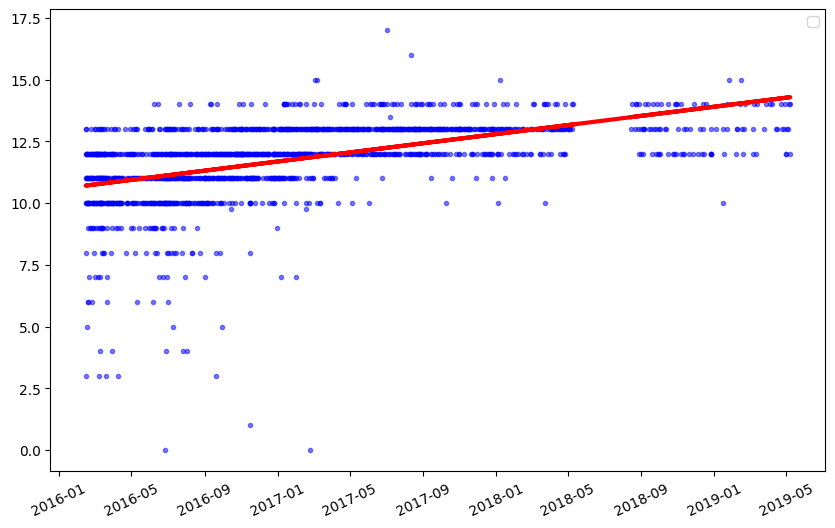

In [50]:
plt.figure(figsize=(10, 6))

# Scatter plot of date vs rating
plt.plot(dog_rates['created_at'], dog_rates['rating'], 'b.', alpha=0.5)

# Fit a line using linear regression (assuming you have the required library imported)

fit = scipy.stats.linregress(dog_rates['created_at'].astype(int), dog_rates['rating'])
plt.plot(dog_rates['created_at'], dog_rates['created_at'].astype(int) * fit.slope + fit.intercept, 'r-', linewidth=3)



plt.xticks(rotation=25)
plt.legend()
plt.show()


In [51]:
dog_rates['residuals'] = dog_rates['rating'] - dog_rates['prediction']

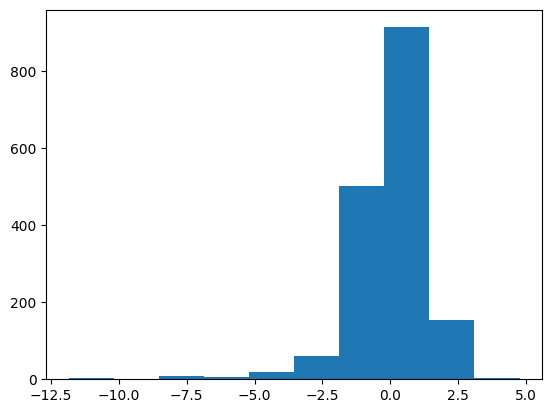

In [53]:
plt.hist(dog_rates['residuals'])
plt.show()

In [54]:
dog_rates

,id,created_at,text,rating,timestamp,prediction,residuals
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763,0.814237
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785,-0.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609,0.820391
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614,-0.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804,-0.163804
...,...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338,0.492662
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856,0.496144
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710,-0.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540,0.517460
